### 衡量回归算法的标准 MSE, MAE, RMSE

衡量标准为:

`sum((y_test_true - y_test_predict)^2)`

测试数据真值与预测数据值差值的平方和

但是这样存在一个问题,就是项数大小的问题:

- 100000项累加和10项累加的结果是无法进行比较,不在一个数量级,没有意义



MSE(Mean Square Error) 均方误差:

[均方误差公式](img/均方误差MSE.png)

RMSE(Root Mean Square Error) 均方根误差:

[均方根误差公式](img/均方根误差RMSE.png)

MAE(Mean Absolute Error) 平均绝对误差:

[平均绝对误差公式](img/平均绝对误差MAE.png)


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

# 构造数据 使用波士顿房地产数据来测试

boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
print(boston.DESCR)  # 查看描述


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston.feature_names  # 为了测试方便,只使用RM(房间个数)这个特征

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
x = boston.data[:,5]
x.shape

(506,)

In [5]:
y = boston.target
y.shape

(506,)

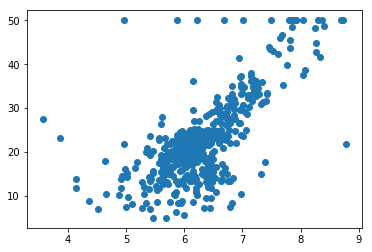

In [6]:
# 绘制RM和房价关系的散点图,观察数据
plt.scatter(x, y)
plt.show()

观察散点图,发现有一些奇怪的点, y=50时,有一些点都在这个值,最上方类似一条直线

这些值不能参与模型计算,需要去掉

因为在现实生活中,调查时可能会人为设计一些上限值, 在波士顿房价数据中,可能人为设计了收集到的房价最高就只能为50W

In [7]:
print(np.max(y))
# 去掉噪音点
x = x[y < 50]
y = y[y < 50]

print('x.shape:', x.shape)
print('y.shape:', y.shape)

50.0
x.shape: (490,)
y.shape: (490,)


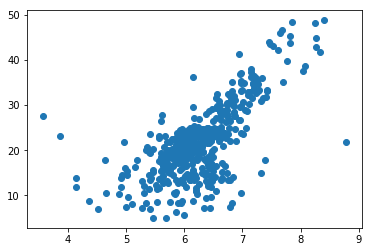

In [8]:
# 再观察数据
plt.scatter(x, y)
plt.show()


### 使用简单线性回归模型测试MSE,RMSE,MAE

In [9]:
from SimpleLinearRegression import SimpleLinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
estimator = SimpleLinearRegression()
estimator

SimpleLinearRegression()

In [10]:
# 训练模型
estimator.fit(x_train, y_train)

# 预测结果
y_predict = estimator.predict(x_test)
y_predict.shape

(123,)

In [11]:
from accuracy_score.metrics import *

# 验证MSE
mean_squared_error(y_test, y_predict)

38.04857903428449

In [12]:
# 验证RMSE
root_mean_squraed_error(y_test, y_predict)

6.168353024453488

In [13]:
# 验证MAE
mean_absolute_error(y_test, y_predict)

4.123063867972173

estimator.a_ =  8.764009052720974
estimator.b_ =  -33.05835524836451


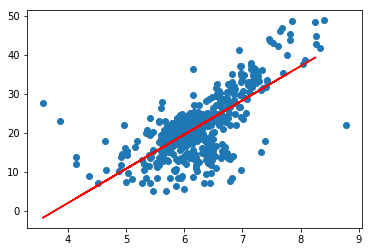

In [18]:
# 查看模型a,b值,并绘制线性回归方差
print('estimator.a_ = ', estimator.a_ )
print('estimator.b_ = ',estimator.b_ )

plt.scatter(x,y)
plt.plot(x_test, y_predict, color='r')
plt.show()

### scikit-learn中的MSE和MAE

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MSE
mean_squared_error(y_test, y_predict)  # 返回结果和我们自己封装的算法差不过

38.04857903428449

In [23]:
# MAE
mean_absolute_error(y_test, y_predict)

4.123063867972173